In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV data
file_path = r"C:\Users\lalde\Downloads\playdata.csv"  # 'r' makes it a raw string, handling backslashes correctly
data = pd.read_csv(file_path)

# Display the first few rows to verify data loading
data.head()

,RIVAL,PLAY #,HF 1ª o 2ª parte,ODK ofensiva/ defensiva/ jugadas extras,SERIES oportunidades,DN oportunidades,DISTANCIA,YARD LN,OFF FORM,OFF STR,...,INTERCEPTED BY_Jersey,INTERCEPTED BY_Name,KEY PLAYER_Jersey,KEY PLAYER_Name,TACKLER1_Jersey,TACKLER1_Name,BLZ_Jersey,BLZ_Name,RUSHER_Jersey,RUSHER_Name
0,SUIZA,1,1,D,1,1.0,20.0,-5.0,SLOT,L,...,NaN,NaN,NaN,NaN,5.0,Estefanía Sastre Lois,1.0,María Vidal,NaN,NaN
1,SUI,2,1,D,1,2.0,12.0,-13.0,SLOT,L,...,NaN,NaN,NaN,NaN,5.0,Estefanía Sastre Lois,1.0,María Vidal,NaN,NaN
2,SUI,3,1,D,1,3.0,4.0,-21.0,SLOT,L,...,NaN,NaN,NaN,NaN,6.0,Laia Girona,1.0,María Vidal,NaN,NaN
3,SUI,4,1,D,1,1.0,10.0,19.0,SLOT,L,...,NaN,NaN,NaN,NaN,8.0,Ana Leal,1.0,María Vidal,NaN,NaN
4,SUI,5,1,D,1,2.0,12.0,12.0,SLOT,L,...,NaN,NaN,NaN,NaN,13.0,Cris Gómez,1.0,María Vidal,NaN,NaN


In [5]:
# Check the column names and data types
data.info()

# Display unique values in key columns to understand structure
print("Unique values in 'RESULT':", data['RESULT'].unique())
print("Unique values in 'PLAY TYPE':", data['PLAY TYPE'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   RIVAL                                    601 non-null    object 
 1   PLAY #                                   601 non-null    int64  
 2   HF 1ª o 2ª parte                         601 non-null    int64  
 3   ODK ofensiva/ defensiva/ jugadas extras  601 non-null    object 
 4   SERIES oportunidades                     601 non-null    int64  
 5   DN oportunidades                         600 non-null    float64
 6   DISTANCIA                                591 non-null    float64
 7   YARD LN                                  600 non-null    float64
 8   OFF FORM                                 598 non-null    object 
 9   OFF STR                                  596 non-null    object 
 10  MOTION                                   2 non-nul

In [7]:
# Select relevant columns and drop rows with missing YARD LN or RESULT values
data = data[['YARD LN', 'RESULT', 'PLAY TYPE']].dropna(subset=['YARD LN', 'RESULT'])

In [9]:
# Filter only for 'Pass' and 'Run' play types to simplify the analysis
data = data[data['PLAY TYPE'].isin(['Pass', 'Run'])]

In [11]:
# Group by yard line and result to count occurrences of each result type at each yard line
yard_summary = data.groupby('YARD LN')['RESULT'].value_counts().unstack().fillna(0)

In [13]:
# Display a snippet of the processed data to verify
yard_summary.head()

RESULT,..............................................................................................................................................................................................................................................................................................................................................................................................,1st DN,Batted Down,Complete,"Complete, TD",Downed,Dropped,Fumble,Incomplete,Interception,"Interception, Def TD",Offsetting Penalties,Penalty,Rush,"Rush, TD",Sack
YARD LN,,,,,,,,,,,,,,,,
-24.0,0.0,6.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-23.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
-22.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
-21.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
-20.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Count the frequency of each play result
result_counts = data['RESULT'].value_counts()

# Set a threshold for minimum frequency
threshold = 10

# Keep only results that appear at least `threshold` times
common_results = result_counts[result_counts >= threshold].index
data_filtered = data[data['RESULT'].isin(common_results)]

In [19]:
# Define a mapping for play results
result_mapping = {
    'Complete, TD': 'TD',
    'Rush, TD': 'TD',
    'Interception, Def TD': 'TD',
    'Incomplete': 'Incomplete',
    'Complete': 'Complete',
    '1st DN': '1st DN',
    'Penalty': 'Penalty',
    'Batted Down': 'Batted Down',
    'Dropped': 'Dropped',
    'Interception': 'Interception',
    'Rush': 'Rush',
    'Sack': 'Sack',
    'Downed': 'Downed',
    # Add other mappings if necessary
}

# Apply the mapping to the RESULT column
data_filtered['RESULT'] = data_filtered['RESULT'].replace(result_mapping)

C:\Users\lalde\AppData\Local\Temp\ipykernel_29644\1559741743.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['RESULT'] = data_filtered['RESULT'].replace(result_mapping)


In [21]:
# Group by yard line and new result to count occurrences of each result type at each yard line
yard_summary = data_filtered.groupby('YARD LN')['RESULT'].value_counts().unstack().fillna(0)

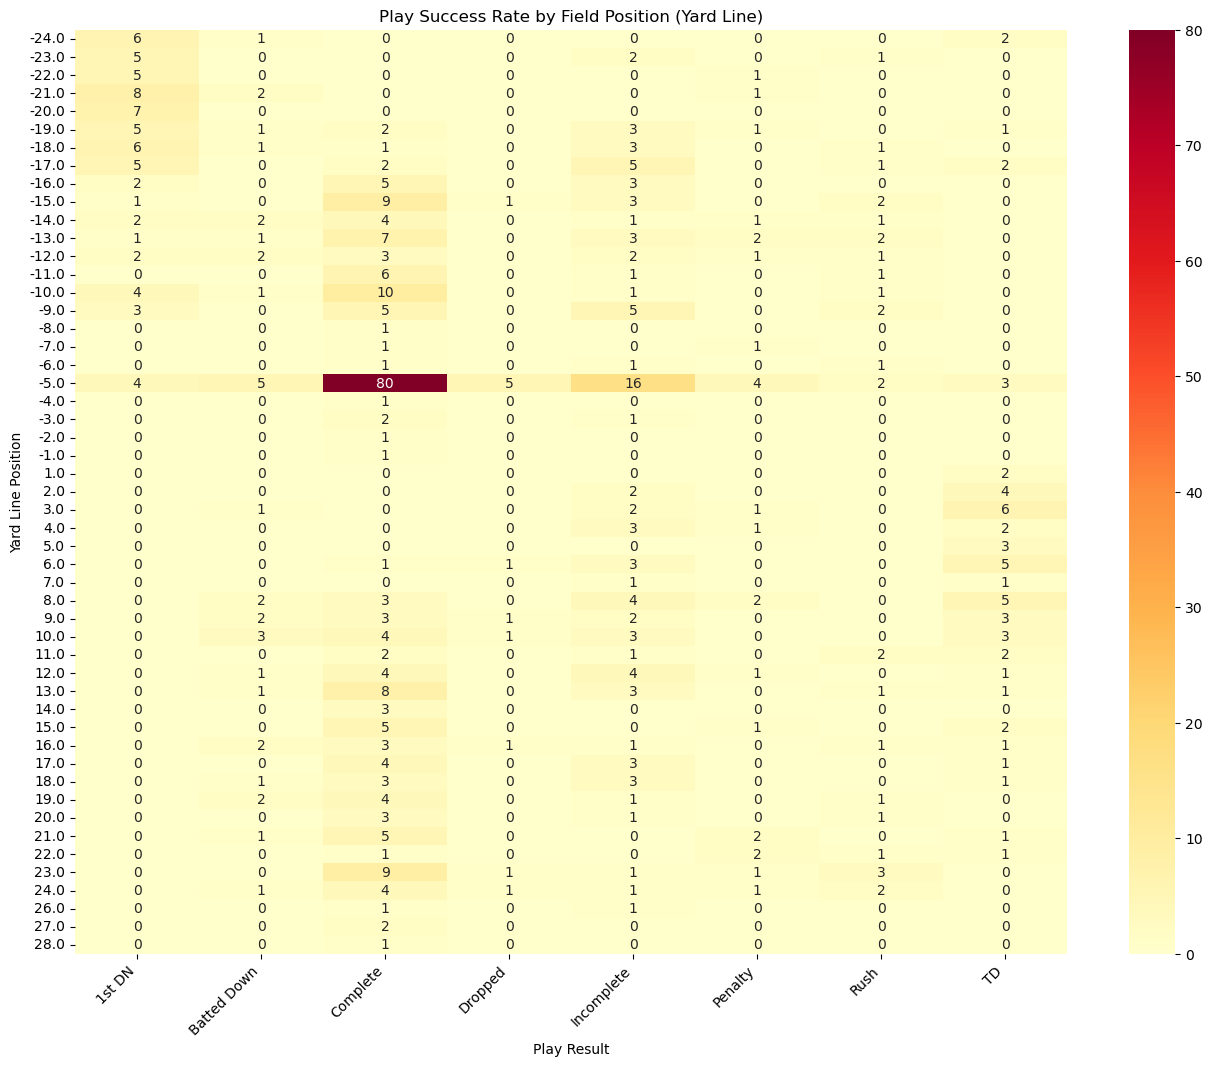

In [23]:
# Set the figure size for better readability
plt.figure(figsize=(16, 12))  # Adjust width and height

# Create a heatmap with the filtered and grouped data
sns.heatmap(yard_summary, cmap='YlOrRd', annot=True, fmt=".0f")

# Add titles and labels
plt.title("Play Success Rate by Field Position (Yard Line)")
plt.xlabel("Play Result")
plt.ylabel("Yard Line Position")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

# Análisis del Heatmap de Resultados de Jugadas por Posición en el Campo

Este heatmap visualiza la distribución de los resultados de jugadas en diferentes posiciones de yardas en el campo durante un partido de flag football. La gráfica muestra qué tan frecuentemente ocurren ciertos resultados de jugadas en posiciones específicas del campo, proporcionando una perspectiva estratégica sobre dónde suelen realizarse o completarse ciertos tipos de jugadas.

## Explicación de los Ejes

- **Eje Y (Posición de Yarda)**: Representa la posición en el campo, con valores negativos indicando la mitad del campo del equipo (cerca de su zona de anotación) y valores positivos acercándose al lado del oponente. El valor `0` representa el medio campo.
  
- **Eje X (Resultado de la Jugada)**: Muestra diferentes categorías de resultados de jugadas, tales como `1st DN` (Primera Oportunidad), `Batted Down` (Pase Bloqueado), `Complete` (Pase Completo), `Dropped` (Pase Soltado), `Incomplete` (Pase Incompleto), `Penalty` (Penalización), `Rush` (Corrida) y `TD` (Touchdown). Algunos resultados, como los touchdowns, han sido agrupados para simplificar el análisis.

## Observaciones Clave

1. **Alta Actividad alrededor de la Yarda -5**:
   - La yarda `-5` muestra una concentración notable de pases completos (celda de color rojo oscuro en la columna `Complete`), lo cual indica una tendencia a realizar pases cortos y seguros cerca de la propia zona de anotación para evitar riesgos de pérdida de balón o ser tackleados cerca de la zona de anotación.

2. **Menor Actividad en las Yardas Positivas**:
   - Al avanzar hacia posiciones de yarda positivas (más cerca de la zona de anotación del oponente), la frecuencia de la mayoría de los resultados de jugadas disminuye. Esto sugiere menos intentos de jugadas o jugadas más conservadoras al acercarse a la zona de anotación.

3. **Resultados de Touchdown (TD) y Primera Oportunidad (1st DN)**:
   - Los resultados de `TD` son menos frecuentes en general, como es común en este tipo de juegos. Las primeras oportunidades (`1st DN`) están más dispersas en el campo, con algunas concentraciones, lo que indica intentos estratégicos de conseguir primeras oportunidades en posiciones específicas.

4. **Pases Incompletos**:
   - Los pases `Incomplete` están distribuidos de manera relativamente uniforme, indicando que los pases incompletos ocurren en diversas posiciones del campo sin una concentración específica.

5. **Otros Resultados**:
   - Resultados como `Batted Down` (pases bloqueados) y `Dropped` (pases soltados) son relativamente raros y aparecen en celdas de colores claros, indicando que no dependen tanto de la posición en el campo.
   - Los resultados de penalizaciones (`Penalty`) y sacks (`Sack`) también son poco frecuentes y se distribuyen sin una concentración en posiciones específicas.

## Conclusión

Este heatmap proporciona una visión estratégica de las tendencias de jugadas basadas en la posición en el campo. La concentración de pases completos cerca de la yarda `-5` destaca una posible estrategia para minimizar riesgos en la mitad defensiva. Además, la dispersión de otros resultados indica que ciertos eventos, como pases incompletos y penalizaciones, no dependen necesariamente de la posición en el campo.

---

**Nota**: Este análisis ayuda a entender la estrategia en el campo y a identificar patrones de juego en función de la posición, ofreciendo insights para decisiones estratégicas en futuras jugadas.

# Decision Trees for Play Outcome Prediction #

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd
import numpy as np

# Load data
file_path = r"C:\Users\lalde\Downloads\playdata.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'RESULT' column is treated as strings
data['RESULT'] = data['RESULT'].astype(str)

# Combine rare classes in 'RESULT' to a generic 'Other' category
result_counts = data['RESULT'].value_counts()
rare_results = result_counts[result_counts < 5].index  # Classes with less than 5 samples
data['RESULT'] = data['RESULT'].replace(rare_results, 'Other')

# Feature Engineering
data['Yard Zone'] = pd.cut(data['YARD LN'], bins=[-50, 0, 50], labels=["Own Territory", "Opponent Territory"])
data['Play Success'] = data['RESULT'].apply(lambda x: 1 if '1st DN' in x or 'TD' in x else 0)

# Select relevant columns
features = data[['DN oportunidades', 'DISTANCIA', 'Yard Zone', 'OFF FORM', 'PLAY TYPE', 'COVERAGE', 'HF 1ª o 2ª parte ', 'Play Success']]
features = pd.get_dummies(features)  # Convert categorical variables to dummy variables
labels = LabelEncoder().fit_transform(data['RESULT'])

# Impute missing values before any further processing
imputer = SimpleImputer(strategy="most_frequent")
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, labels, test_size=0.3, random_state=42)

# Apply SMOTE with reduced k_neighbors
smote = SMOTE(random_state=42, k_neighbors=3)  # Set k_neighbors lower to handle small classes
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define base models for stacking
base_models = [
    ('xgb', xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=42)),
    ('rf', RandomForestClassifier(class_weight="balanced", random_state=42))
]

# Meta-model for stacking
meta_model = LogisticRegression()

# Stacking model with base models and meta-model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=skf)

# Train stacking model with SMOTE on each fold
stacking_scores = []
for train_idx, val_idx in skf.split(X_train, y_train):
    X_train_fold, y_train_fold = smote.fit_resample(X_train.iloc[train_idx], y_train[train_idx])
    stacking_clf.fit(X_train_fold, y_train_fold)
    val_score = stacking_clf.score(X_train.iloc[val_idx], y_train[val_idx])
    stacking_scores.append(val_score)

print(f"Stacking Model Cross-Validated Accuracy with SMOTE: {np.mean(stacking_scores) * 100:.2f}%")

# Evaluate the stacking model on the test set
stacking_clf.fit(X_train, y_train)  # Fit on entire training set
stacking_test_accuracy = stacking_clf.score(X_test, y_test)
print(f"Stacking Model Test Accuracy: {stacking_test_accuracy * 100:.2f}%")

# Hyperparameter Tuning for XGBoost with RandomizedSearchCV (without early stopping)
param_grid = {
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1],
    'min_child_weight': [1, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1],
    'lambda': [1],
    'alpha': [0.5]
}

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=42)

randomized_search_xgb = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=16,  # Randomly sample 16 parameter combinations since 16 is the total possible here
    cv=skf,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV to find the best hyperparameters (without early stopping)
randomized_search_xgb.fit(X_train, y_train)

# Retrieve best model parameters from RandomizedSearchCV
best_params = randomized_search_xgb.best_params_

# Reinitialize XGBoost with best parameters for final evaluation with early stopping
best_xgb_model = xgb.XGBClassifier(
    **best_params,
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    random_state=42,
    eval_metric="mlogloss",
    early_stopping_rounds=10
)

# Fit with early stopping on the test set
best_xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Evaluate best XGBoost model on test set
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Tuned XGBoost Accuracy on Test Set: {accuracy_best_xgb * 100:.2f}%")

# Cross-validation score of the best XGBoost model WITHOUT early stopping
# (to avoid validation error during cross-validation)
best_xgb_no_early_stop = xgb.XGBClassifier(
    **best_params,
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    random_state=42
)
cross_val_scores_best_xgb = cross_val_score(best_xgb_no_early_stop, features_imputed, labels, cv=skf, scoring='accuracy')
print(f"Tuned XGBoost Cross-Validated Accuracy: {np.mean(cross_val_scores_best_xgb) * 100:.2f}%")


Stacking Model Cross-Validated Accuracy with SMOTE: 60.48%
Stacking Model Test Accuracy: 67.40%
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[0]	validation_0-mlogloss:2.32043
[1]	validation_0-mlogloss:2.18545
[2]	validation_0-mlogloss:2.05571
[3]	validation_0-mlogloss:1.94995
[4]	validation_0-mlogloss:1.84291
[5]	validation_0-mlogloss:1.75196
[6]	validation_0-mlogloss:1.66870
[7]	validation_0-mlogloss:1.59316
[8]	validation_0-mlogloss:1.53551
[9]	validation_0-mlogloss:1.47788
[10]	validation_0-mlogloss:1.42812
[11]	validation_0-mlogloss:1.39487
[12]	validation_0-mlogloss:1.36046
[13]	validation_0-mlogloss:1.32430
[14]	validation_0-mlogloss:1.29670
[15]	validation_0-mlogloss:1.27215
[16]	validation_0-mlogloss:1.24441
[17]	validation_0-mlogloss:1.22118
[18]	validation_0-mlogloss:1.20005
[19]	validation_0-mlogloss:1.18438
[20]	validation_0-mlogloss:1.17073
[21]	validation_0-mlogloss:1.15507
[22]	validation_0-mlogloss:1.14080
[23]	validation_0-mlogloss:1.12958
[24]	validati

#### EJEMPLO

In [32]:
from joblib import dump, load

# Save the stacking model and best XGBoost model
dump(stacking_clf, 'stacking_model.joblib')
dump(best_xgb_model, 'best_xgb_model.joblib')

print("Models saved successfully!")

Models saved successfully!
